### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Reading File
df = pd.read_csv('E:/ExcelR Assignment/Assignment 5 - Multi Linear Regression/ToyotaCorolla.csv',encoding= 'unicode_escape')
df = df.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1)
df.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

#### Understanding Data

In [4]:
df.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

In [5]:
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

#### Finding Correlation

In [6]:
df.corr()

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.876590 -0.569960  0.314990  0.126389  0.185326   
Age_08_04     -0.876590   1.000000  0.505672 -0.156622 -0.098084 -0.148359   
KM            -0.569960   0.505672  1.000000 -0.333538  0.102683 -0.036197   
HP             0.314990  -0.156622 -0.333538  1.000000  0.035856  0.092424   
cc             0.126389  -0.098084  0.102683  0.035856  1.000000  0.079903   
Doors          0.185326  -0.148359 -0.036197  0.092424  0.079903  1.000000   
Gears          0.063104  -0.005364  0.015023  0.209477  0.014629 -0.160141   
Quarterly_Tax  0.219197  -0.198431  0.278165 -0.298432  0.306996  0.109363   
Weight         0.581198  -0.470253 -0.028598  0.089614  0.335637  0.302618   

                  Gears  Quarterly_Tax    Weight  
Price          0.063104       0.219197  0.581198  
Age_08_04     -0.005364      -0.198431 -0.470253  
KM             0.015023       0.278165 -0.028598  
HP             0.209477      -0.298432  0.089614  
cc             0.014629       0.306996  0.335637  
Doors         -0.160141       0.109363  0.302618  
Gears          1.000000      -0.005452  0.020613  
Quarterly_Tax -0.005452       1.000000  0.626134  
Weight         0.020613       0.626134  1.000000

<AxesSubplot:>

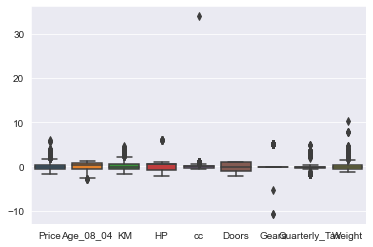

In [56]:
sns.boxplot(data=df,orient=False)

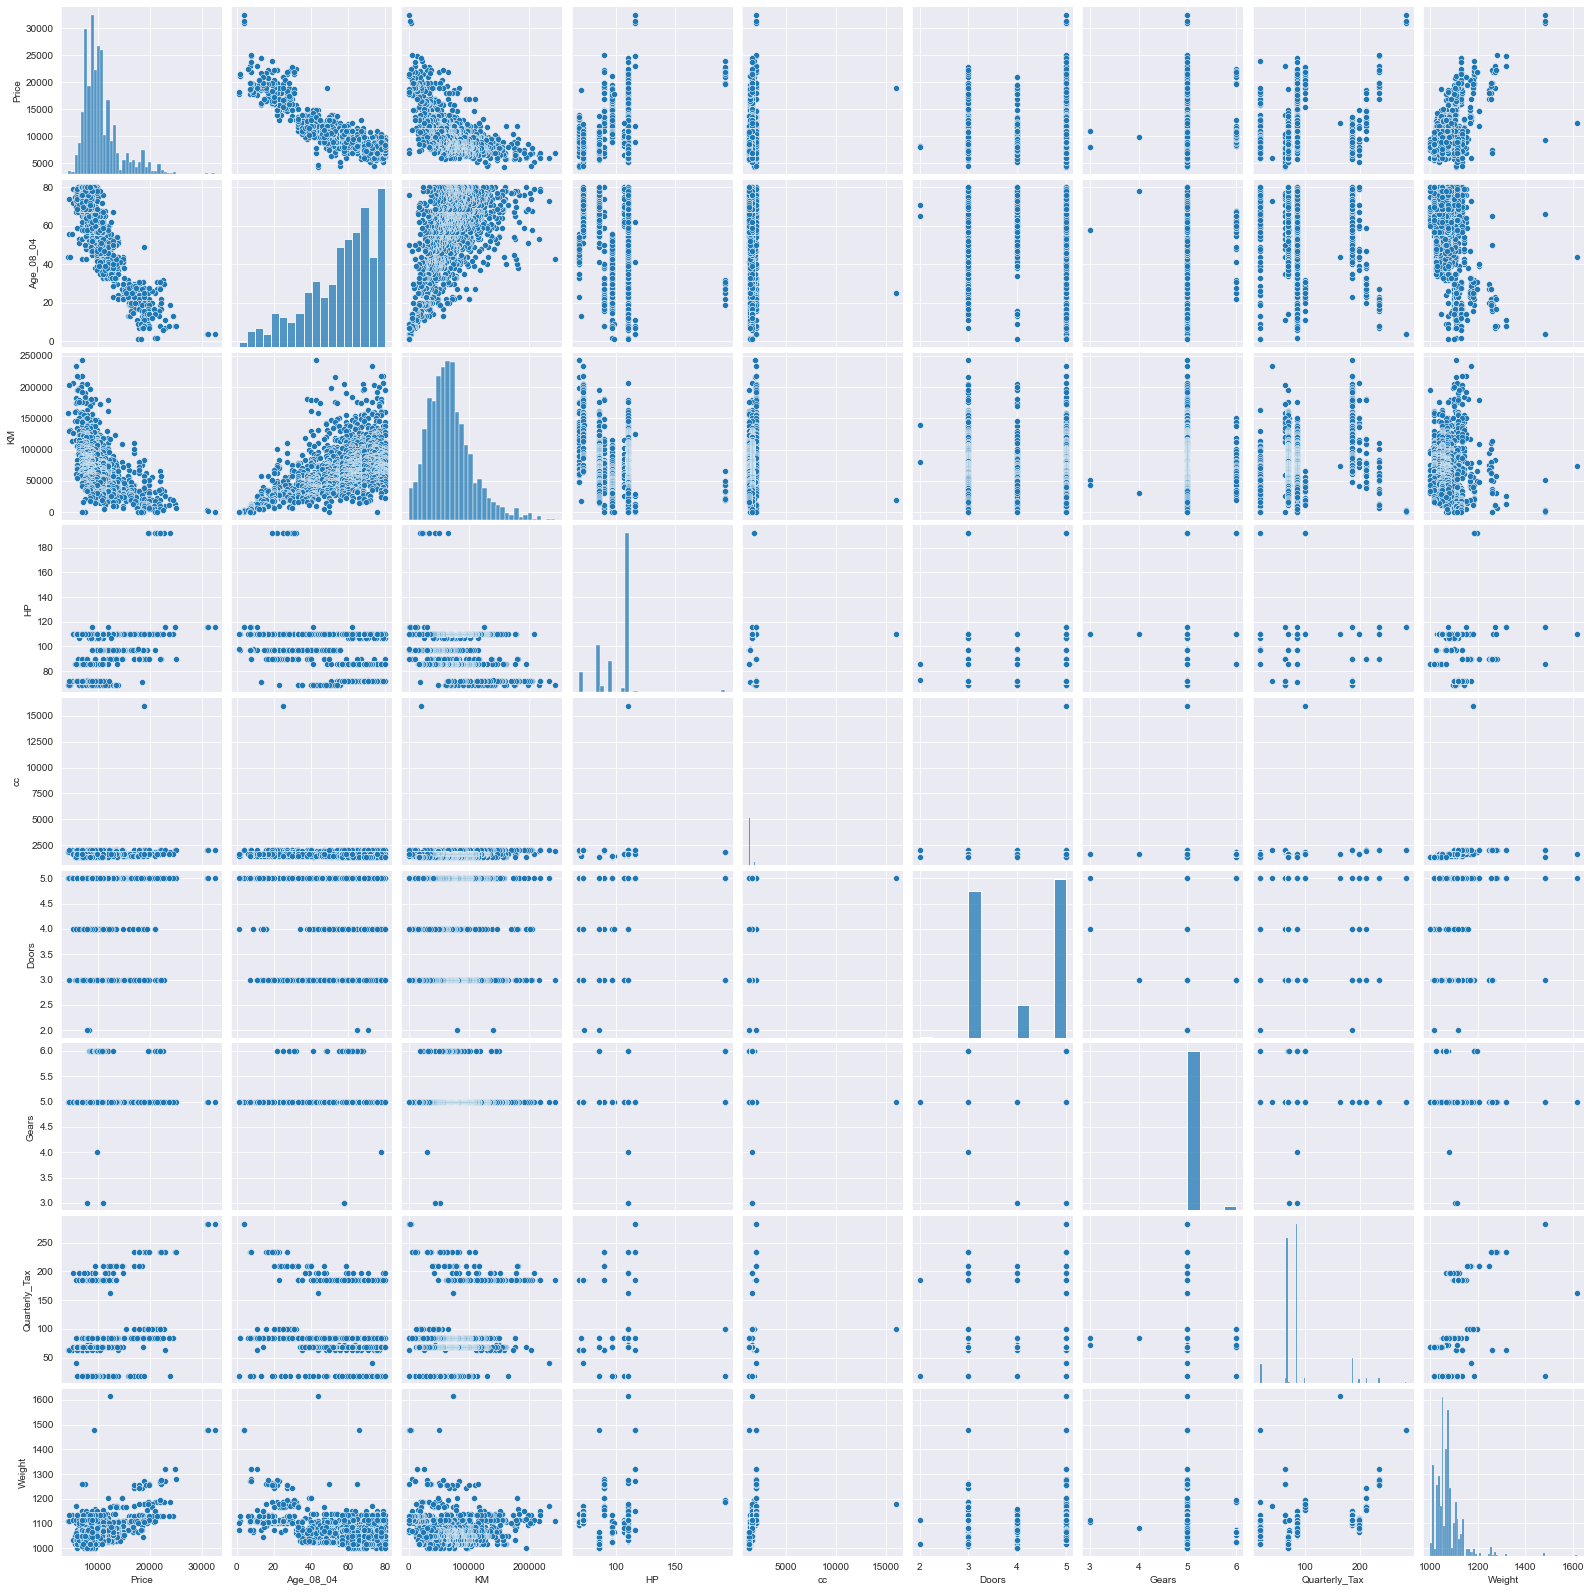

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [8]:
# Building Model
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

In [9]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [10]:
model.tvalues,model.pvalues

(Intercept        -3.948666
 Age_08_04       -46.511852
 KM              -16.621622
 HP               11.241018
 cc               -1.344222
 Doors            -0.040410
 Gears             3.016007
 Quarterly_Tax     3.014535
 Weight           15.879803
 dtype: float64,
 Intercept         8.241949e-05
 Age_08_04        3.354724e-288
 KM                7.538439e-57
 HP                3.757218e-28
 cc                1.790902e-01
 Doors             9.677716e-01
 Gears             2.606549e-03
 Quarterly_Tax     2.619148e-03
 Weight            2.048576e-52
 dtype: float64)

In [11]:
# Making Individual Regression Model

m1_age = smf.ols('Price~Age_08_04',data=df).fit()
m1_km = smf.ols('Price~KM',data=df).fit()
m1_hp = smf.ols('Price~Age_08_04',data=df).fit()
m1_cc = smf.ols('Price~cc',data=df).fit()
m1_doors = smf.ols('Price~Doors',data=df).fit()
m1_gears = smf.ols('Price~Gears',data=df).fit()
m1_QT = smf.ols('Price~Quarterly_Tax',data=df).fit()
m1_wt = smf.ols('Price~Weight',data=df).fit()
m1_age.pvalues,m1_km.pvalues,m1_hp.pvalues,m1_cc.pvalues,m1_doors.pvalues,m1_gears.pvalues,m1_QT.pvalues,m1_wt.pvalues

(Intercept    0.0
 Age_08_04    0.0
 dtype: float64,
 Intercept     0.000000e+00
 KM           1.757913e-124
 dtype: float64,
 Intercept    0.0
 Age_08_04    0.0
 dtype: float64,
 Intercept    1.766912e-112
 cc            1.550808e-06
 dtype: float64,
 Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64,
 Intercept    0.069804
 Gears        0.016775
 dtype: float64,
 Intercept        1.532168e-246
 Quarterly_Tax     4.407393e-17
 dtype: float64,
 Intercept     1.739508e-80
 Weight       1.630487e-130
 dtype: float64)

In [12]:
# Calculating VIF

rsq_Age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
rsq_hp = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
rsq_cc = smf.ols('cc~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
rsq_doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared
rsq_gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=df).fit().rsquared
rsq_QT = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=df).fit().rsquared
rsq_wt = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=df).fit().rsquared
vif_Age = 1/(1-rsq_Age)
vif_km = 1/(1-rsq_km)
vif_hp = 1/(1-rsq_hp)
vif_cc = 1/(1-rsq_cc)
vif_doors = 1/(1-rsq_doors)
vif_gears = 1/(1-rsq_gears)
vif_QT = 1/(1-rsq_QT)
vif_wt = 1/(1-rsq_wt)

<ipython-input-12-1718f5aa590f>:14: RuntimeWarning: divide by zero encountered in double_scalars
  vif_cc = 1/(1-rsq_cc)


In [15]:
df1 = {'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_Age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_QT,vif_wt]}
vif_frame = pd.DataFrame(df1)
vif_frame

Variables       VIF
0      Age_08_04  1.884620
1             KM  1.756905
2             HP  1.419422
3             cc       inf
4          Doors  1.156575
5          Gears  1.098723
6  Quarterly_Tax  2.311431
7         Weight  2.516420

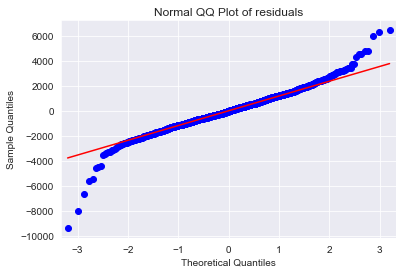

In [16]:
#  Residual Analysis
qqplot = sm.qqplot(model.resid,line = 'q')
plt.title("Normal QQ Plot of residuals")
plt.show()

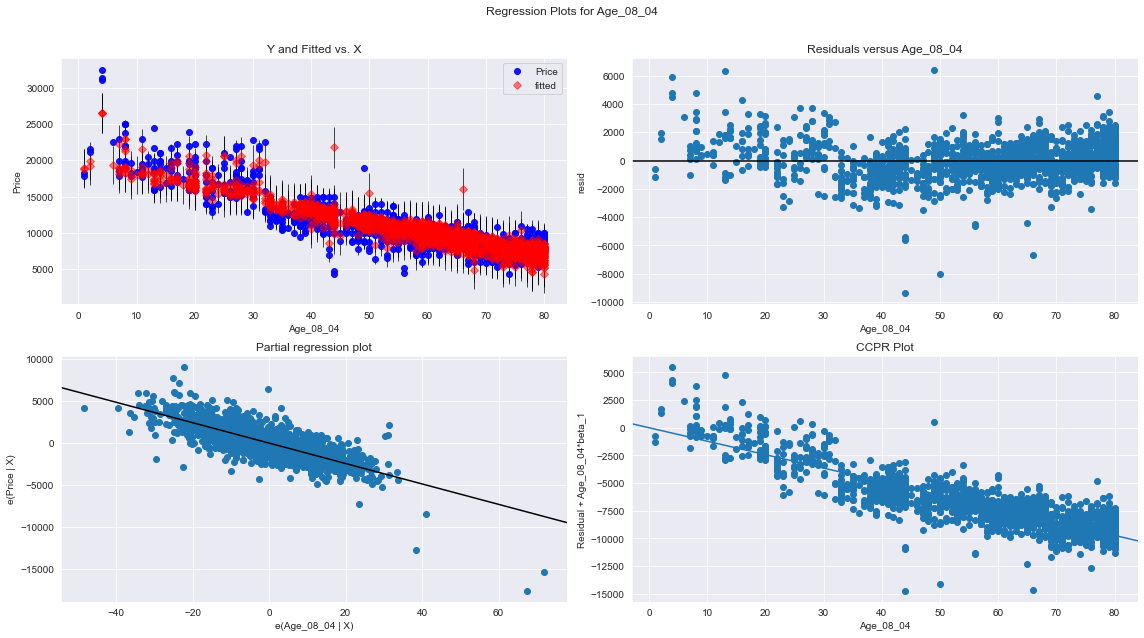

In [17]:
# Age_08_04
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"Age_08_04",fig=fig)
plt.show()

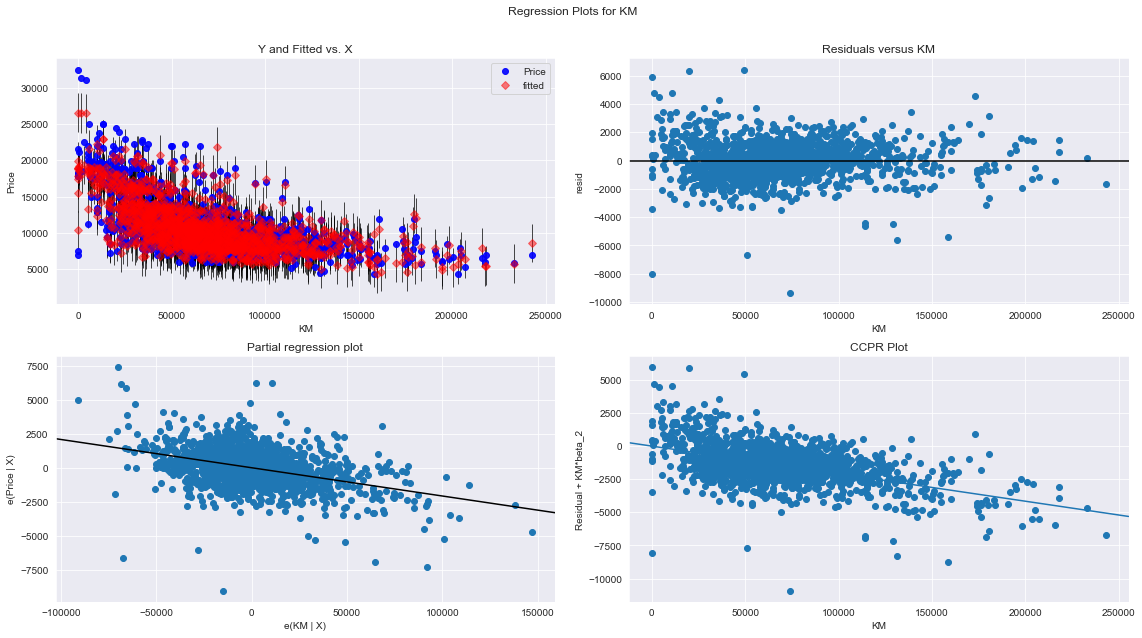

In [18]:
# KM

fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

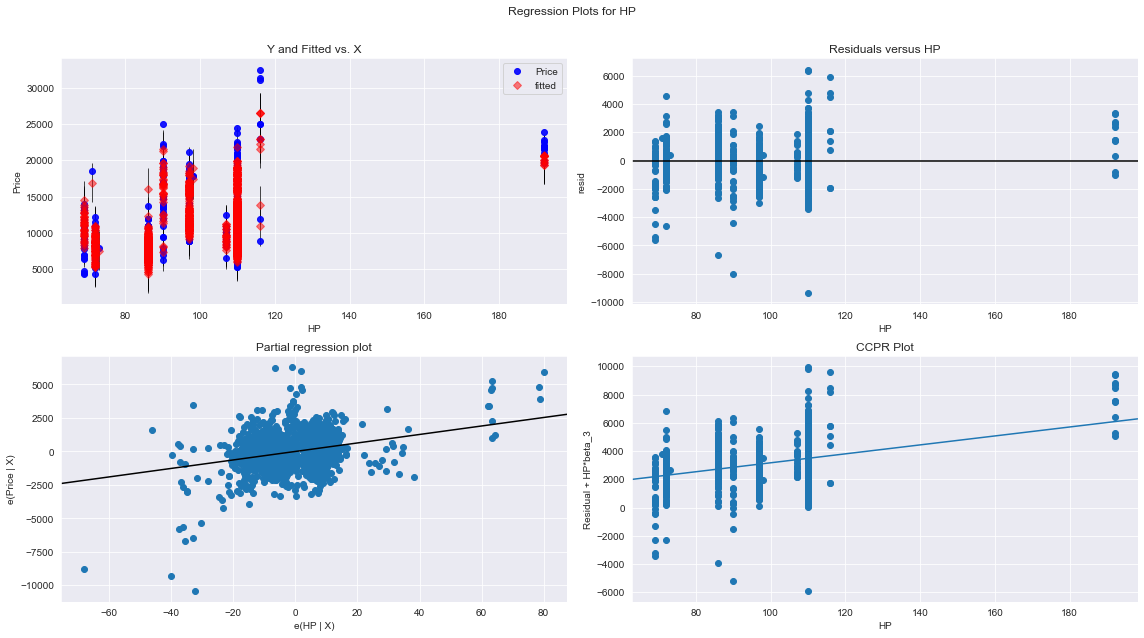

In [19]:
# HP

fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

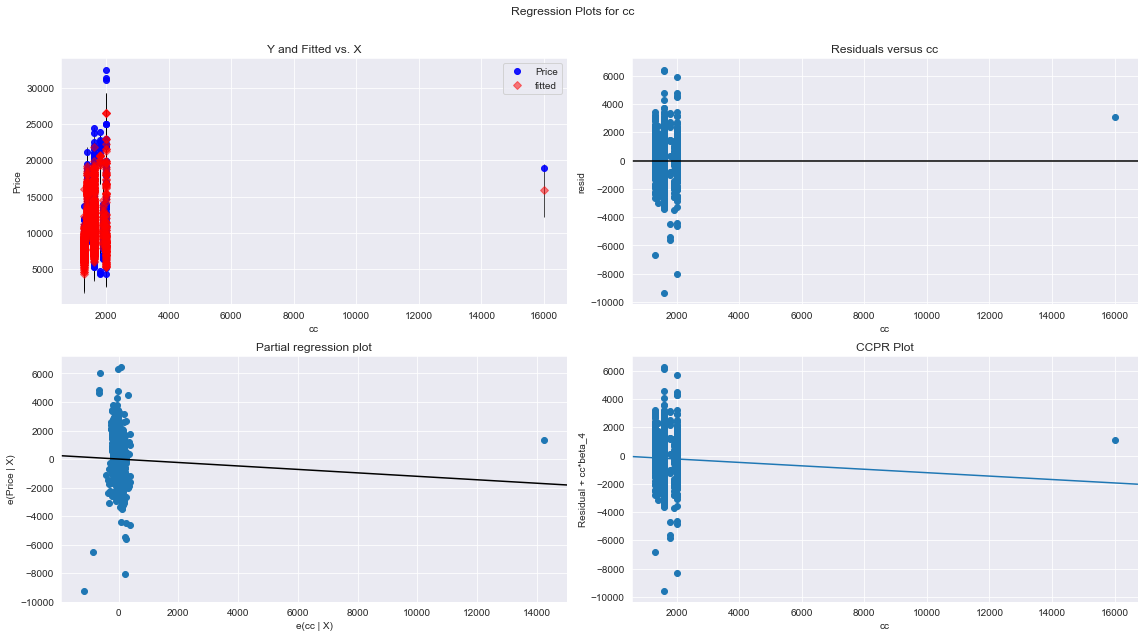

In [20]:
# cc
    
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

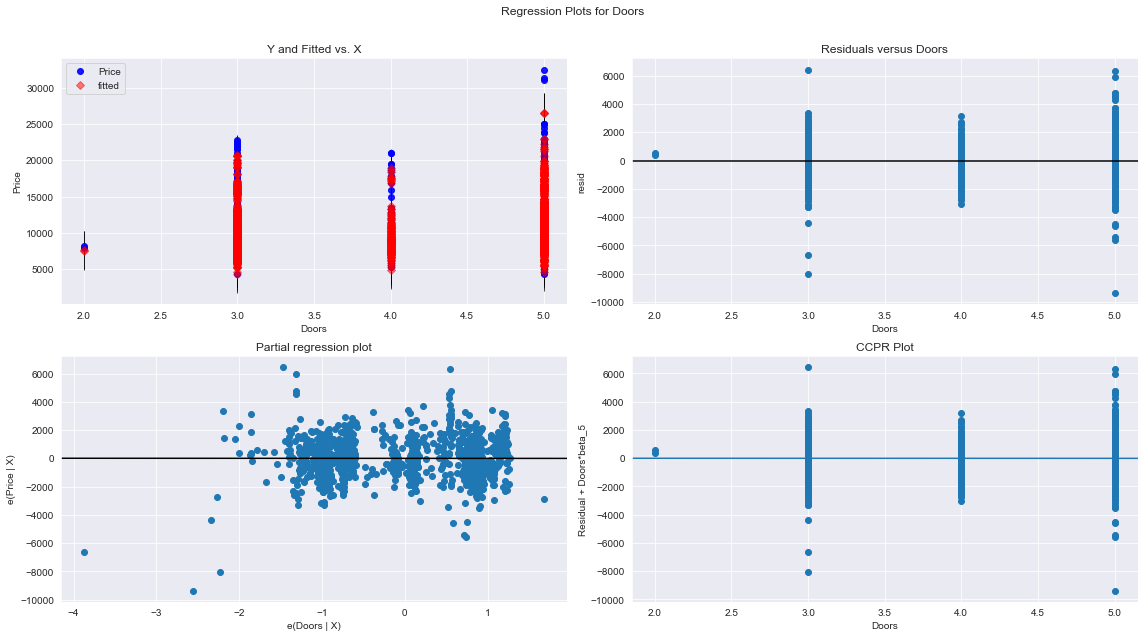

In [21]:
# Doors

fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

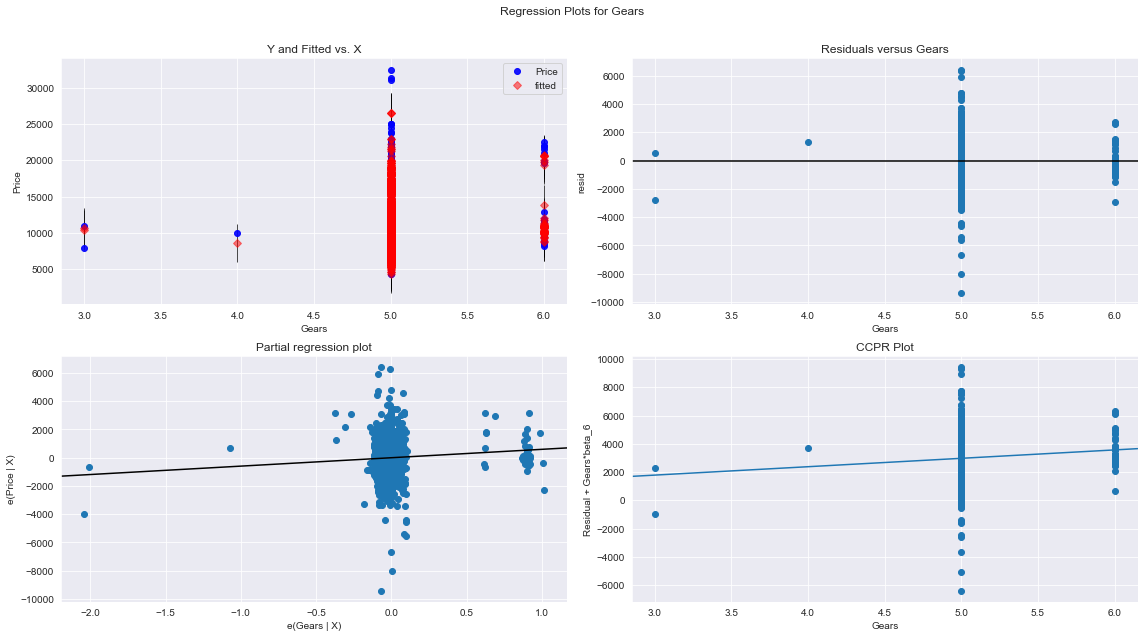

In [22]:
# Gears
    
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

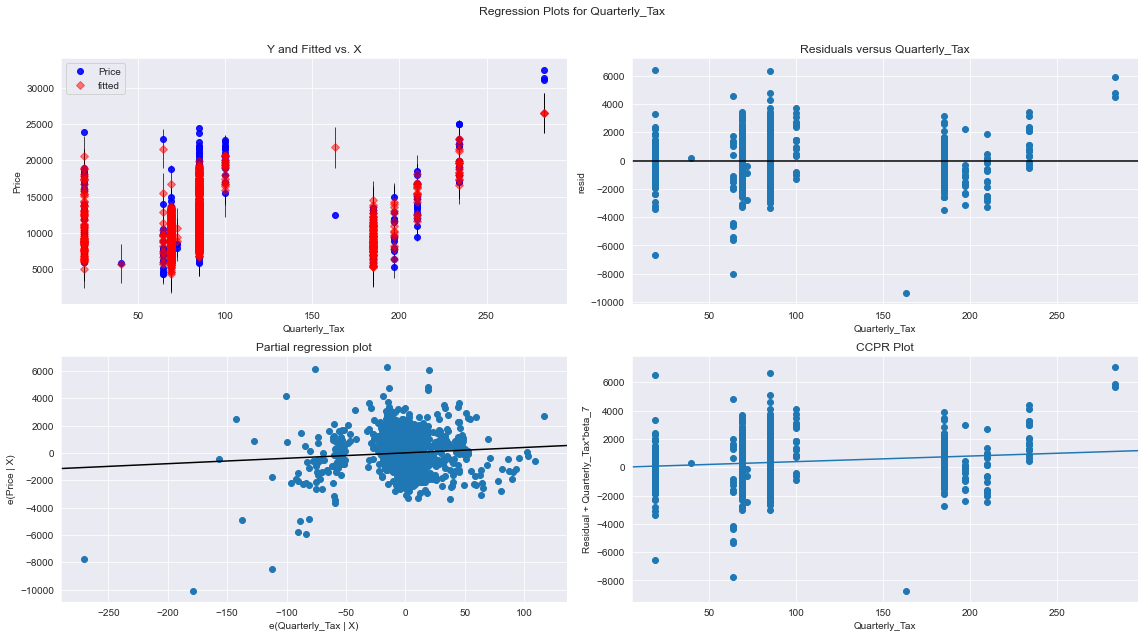

In [23]:
# Quarterly Tax
    
fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"Quarterly_Tax",fig=fig)
plt.show()

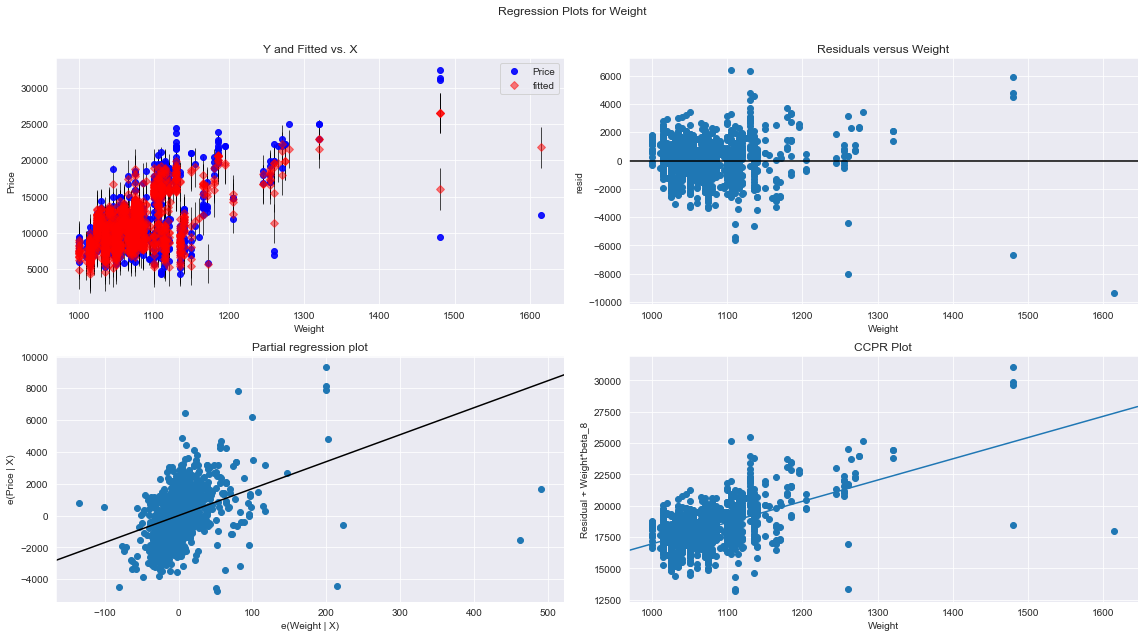

In [24]:
# Weight

fig = plt.figure(figsize=(16,9))
fig = sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

### Model Deletion Diagnostics

In [27]:
model_influence = model.get_influence()
(c,x) = model_influence.cooks_distance

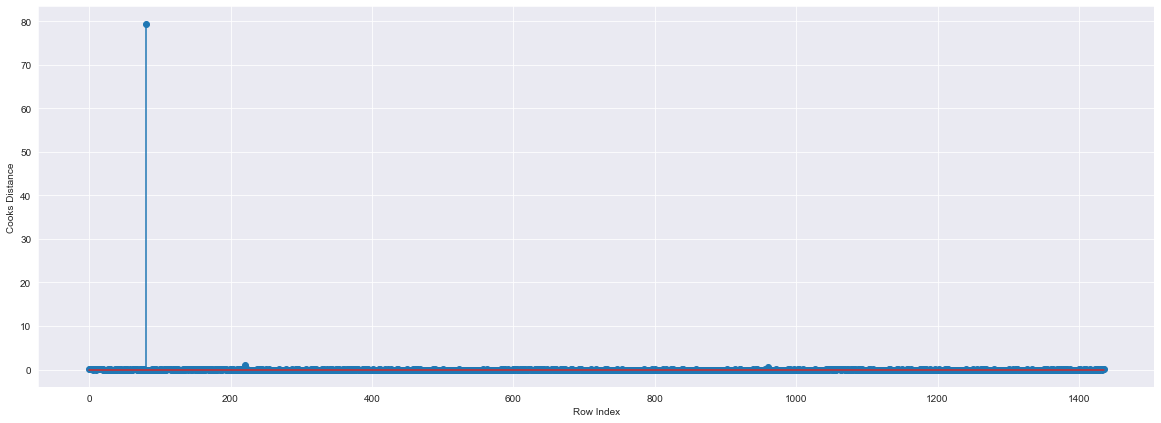

In [28]:
# Plot influencers using stem plot

fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

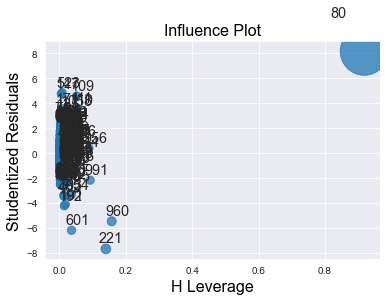

In [29]:
# Influencers

influence_plot(model)
plt.show()

In [30]:
# Improving the model

data_new = df.drop(df.index[[80]],axis=0).reset_index()
data_new = data_new.drop(['index'],axis=1)

# Final Model Building

final_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data_new).fit()
finalmodelwt = final_model.rsquared

# Predict for given data

new_data = pd.DataFrame({'Age_08_04':26,'KM':48000,'HP':90,'cc':2000,'Doors':3,'Gears':5,'Quarterly_Tax':210,'Weight':1165},index=[1])
predictwt = final_model.predict(new_data)

In [31]:
final_model.params

Intercept       -6284.740060
Age_08_04        -120.455049
KM                 -0.017849
HP                 39.346295
cc                 -2.524177
Doors             -27.228488
Gears             523.941556
Quarterly_Tax       9.043968
Weight             20.165459
dtype: float64

In [32]:
predictwt

1    16149.527067
dtype: float64

In [33]:
finalmodelwt

0.8693790488655819

## With Transformation

In [34]:
df = pd.read_csv('E:/ExcelR Assignment/Assignment 5 - Multi Linear Regression/ToyotaCorolla.csv',encoding= 'unicode_escape')
df = df.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1)
df.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

### Standardization

In [35]:
df.iloc[:,:] = StandardScaler().fit_transform(df.iloc[:,:])
df.head()

Price  Age_08_04        KM        HP        cc     Doors     Gears  \
0  0.763763  -1.771966 -0.574695 -0.768042  0.997419 -1.085139 -0.140425   
1  0.832715  -1.771966  0.117454 -0.768042  0.997419 -1.085139 -0.140425   
2  0.887877  -1.718184 -0.715386 -0.768042  0.997419 -1.085139 -0.140425   
3  1.163685  -1.610620 -0.547650 -0.768042  0.997419 -1.085139 -0.140425   
4  0.832715  -1.395491 -0.801028 -0.768042  0.997419 -1.085139 -0.140425   

   Quarterly_Tax    Weight  
0        2.98868  1.758561  
1        2.98868  1.758561  
2        2.98868  1.758561  
3        2.98868  1.758561  
4        2.98868  1.853577

#### Finding Correlation

In [36]:
df.corr()

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.876590 -0.569960  0.314990  0.126389  0.185326   
Age_08_04     -0.876590   1.000000  0.505672 -0.156622 -0.098084 -0.148359   
KM            -0.569960   0.505672  1.000000 -0.333538  0.102683 -0.036197   
HP             0.314990  -0.156622 -0.333538  1.000000  0.035856  0.092424   
cc             0.126389  -0.098084  0.102683  0.035856  1.000000  0.079903   
Doors          0.185326  -0.148359 -0.036197  0.092424  0.079903  1.000000   
Gears          0.063104  -0.005364  0.015023  0.209477  0.014629 -0.160141   
Quarterly_Tax  0.219197  -0.198431  0.278165 -0.298432  0.306996  0.109363   
Weight         0.581198  -0.470253 -0.028598  0.089614  0.335637  0.302618   

                  Gears  Quarterly_Tax    Weight  
Price          0.063104       0.219197  0.581198  
Age_08_04     -0.005364      -0.198431 -0.470253  
KM             0.015023       0.278165 -0.028598  
HP             0.209477      -0.298432  0.089614  
cc             0.014629       0.306996  0.335637  
Doors         -0.160141       0.109363  0.302618  
Gears          1.000000      -0.005452  0.020613  
Quarterly_Tax -0.005452       1.000000  0.626134  
Weight         0.020613       0.626134  1.000000

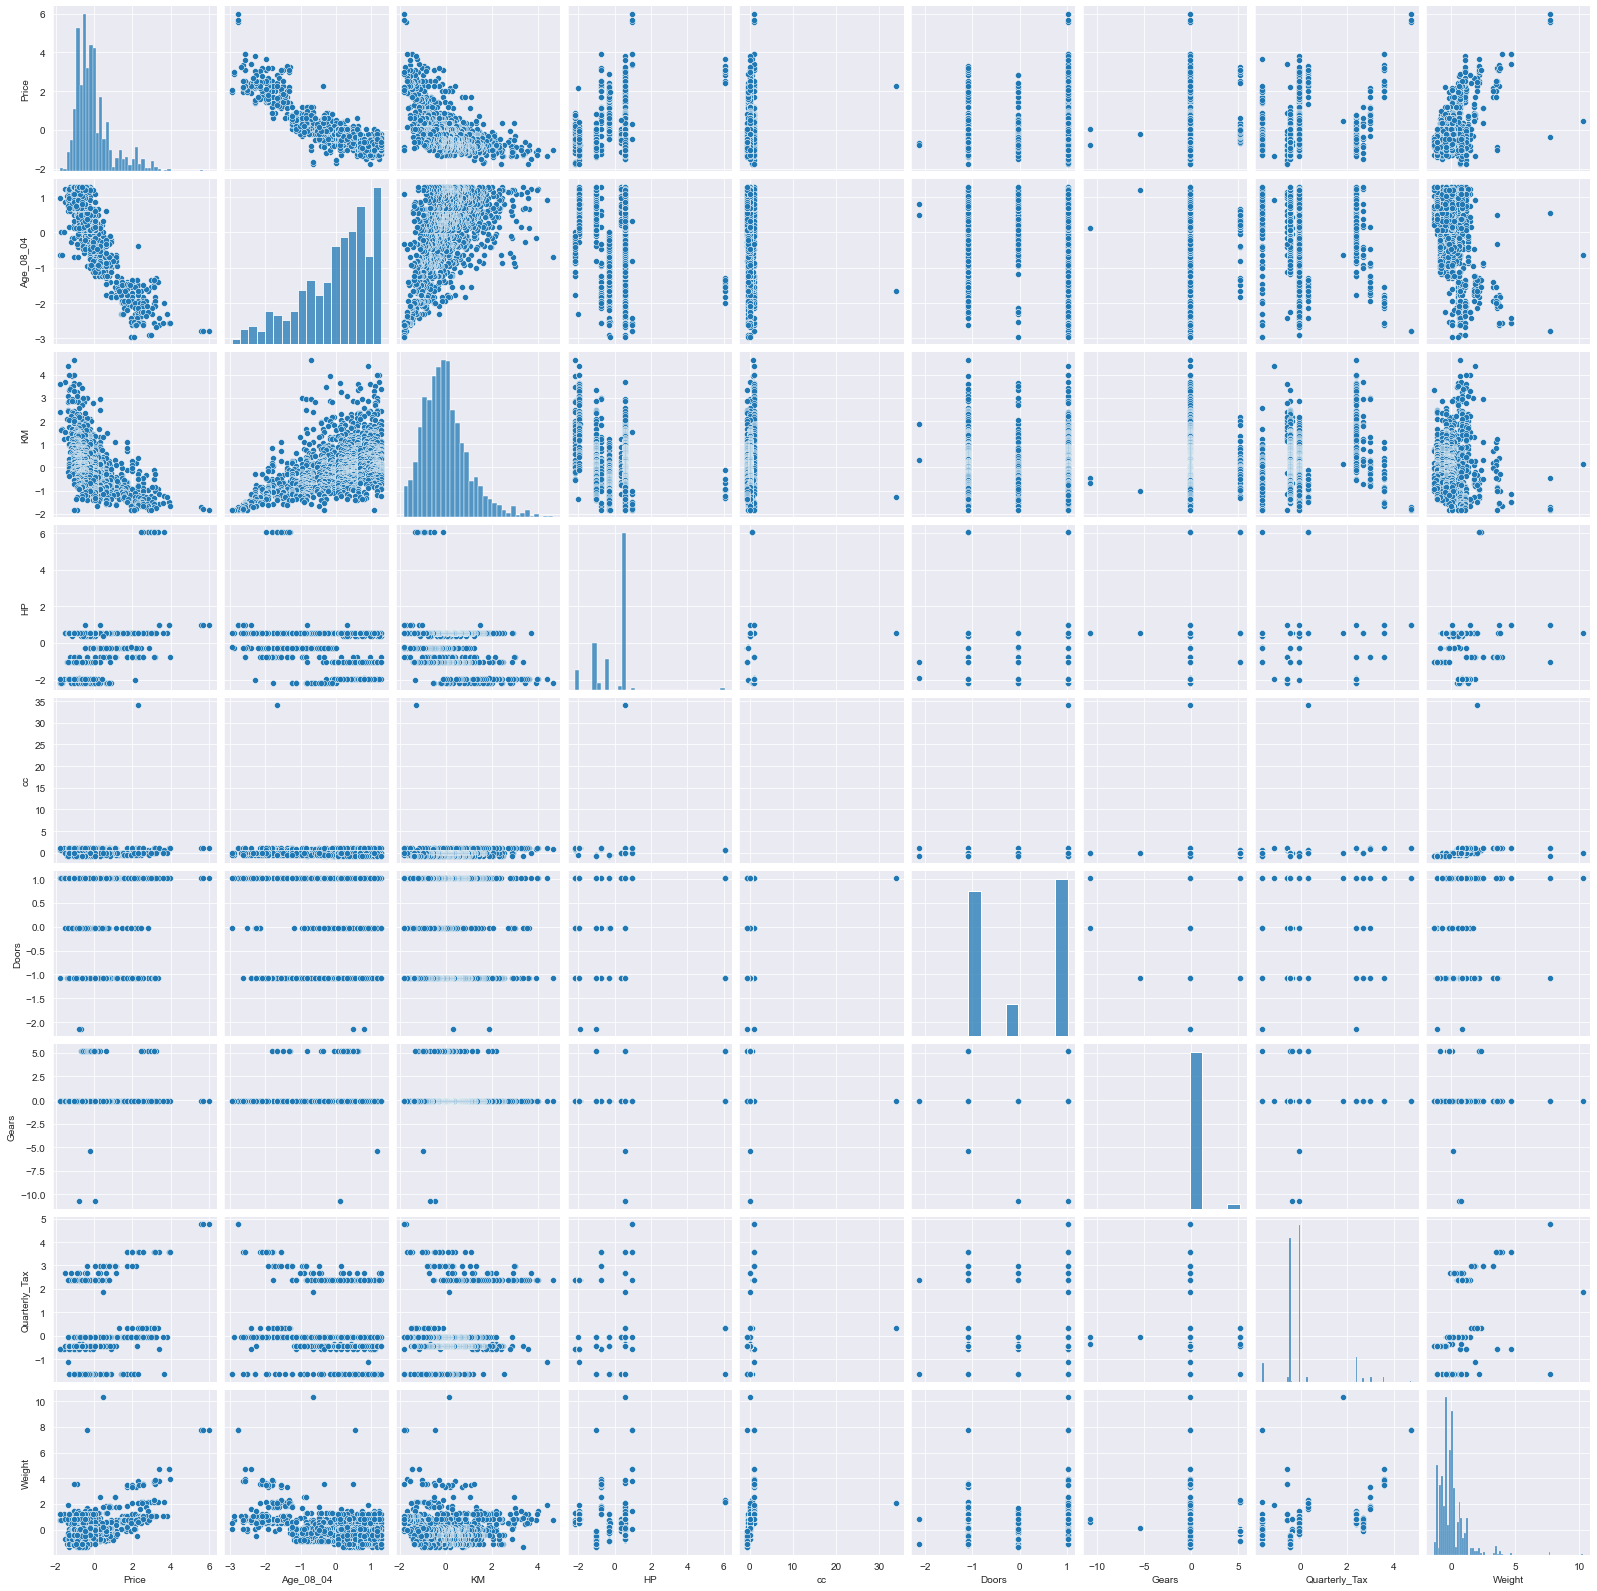

In [37]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

### Build Model

In [39]:
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

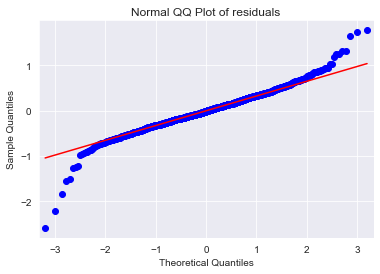

In [40]:
#  Residual Analysis

qqplot = sm.qqplot(model1.resid,line = 'q')
plt.title("Normal QQ Plot of residuals")
plt.show()

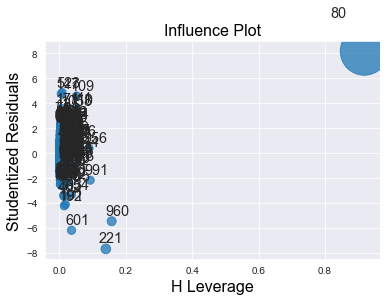

In [41]:
# Influencers

influence_plot(model1)
plt.show()

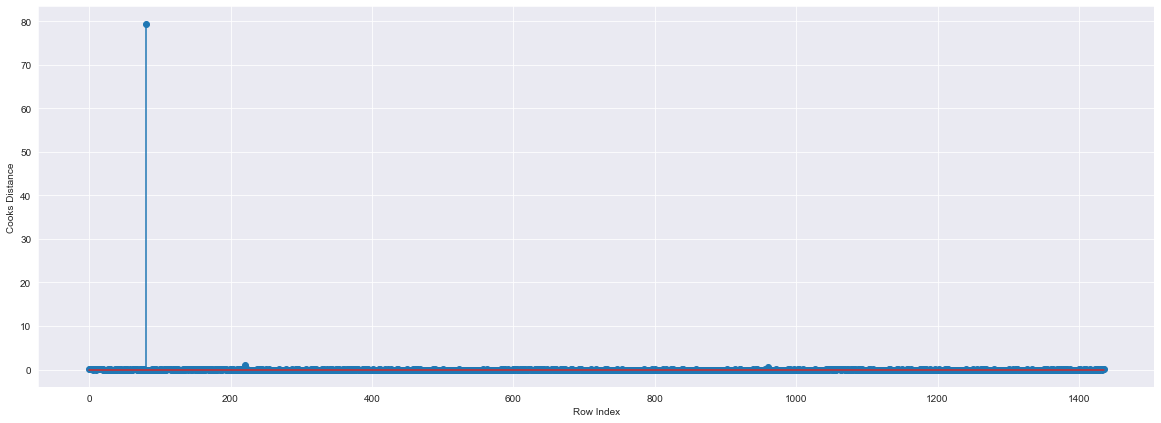

In [46]:
model_influence = model1.get_influence()
(c,x) = model_influence.cooks_distance
# Plot influencers using stem plot

fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
# Improving the model

data_new = df.drop(df.index[[80]],axis=0).reset_index()
data_new = data_new.drop(['index'],axis=1)

# Final Model Building

final_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data_new).fit()
finalmodel1 = final_model.rsquared

# Predict for given data

new_data = pd.DataFrame({'Age_08_04':26,'KM':48000,'HP':90,'cc':2000,'Doors':3,'Gears':5,'Quarterly_Tax':210,'Weight':1165},index=[1])
predict1 = final_model.predict(new_data)

In [43]:
final_model.params

Intercept       -0.007198
Age_08_04       -0.617724
KM              -0.184572
HP               0.162519
cc              -0.295351
Doors           -0.007152
Gears            0.027232
Quarterly_Tax    0.102556
Weight           0.292678
dtype: float64

In [44]:
finalmodel1

0.8693790488655818

### Quantile Transformation

In [146]:
df = pd.read_csv('E:/ExcelR Assignment/Assignment 5 - Multi Linear Regression/ToyotaCorolla.csv',encoding= 'unicode_escape')
df = df.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1)
df.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [147]:
# Quantile Transformer

qt = QuantileTransformer(random_state=0)
qtdf = qt.fit_transform(df)
qtdf = qt.transform(df)
df_qtdata = pd.DataFrame(data=qtdf, columns=['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'])
df_qtdata.head()

Price  Age_08_04        KM        HP        cc     Doors     Gears  \
0  0.847848   0.080080  0.294745  0.261762  0.958458  0.217718  0.486486   
1  0.855355   0.080080  0.606682  0.261762  0.958458  0.217718  0.486486   
2  0.862863   0.083584  0.241271  0.261762  0.958458  0.217718  0.486486   
3  0.878378   0.093093  0.308308  0.261762  0.958458  0.217718  0.486486   
4  0.855355   0.118118  0.209444  0.261762  0.958458  0.217718  0.486486   

   Quarterly_Tax    Weight  
0       0.978478  0.958959  
1       0.978478  0.958959  
2       0.978478  0.958959  
3       0.978478  0.958959  
4       0.978478  0.963463

### Finding Correlation

In [148]:
df_qtdata.corr()

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.841163 -0.615641  0.235702  0.147965  0.208832   
Age_08_04     -0.841163   1.000000  0.530927 -0.091719 -0.140818 -0.139092   
KM            -0.615641   0.530927  1.000000 -0.205464  0.157477 -0.042996   
HP             0.235702  -0.091719 -0.205464  1.000000  0.400790  0.147308   
cc             0.147965  -0.140818  0.157477  0.400790  1.000000  0.152336   
Doors          0.208832  -0.139092 -0.042996  0.147308  0.152336  1.000000   
Gears          0.076067  -0.023353  0.019724  0.136519  0.071749 -0.160334   
Quarterly_Tax  0.319276  -0.271365  0.024733  0.062939  0.520287  0.366041   
Weight         0.415732  -0.381465 -0.063968  0.169269  0.691025  0.460565   

                  Gears  Quarterly_Tax    Weight  
Price          0.076067       0.319276  0.415732  
Age_08_04     -0.023353      -0.271365 -0.381465  
KM             0.019724       0.024733 -0.063968  
HP             0.136519       0.062939  0.169269  
cc             0.071749       0.520287  0.691025  
Doors         -0.160334       0.366041  0.460565  
Gears          1.000000       0.100044  0.015954  
Quarterly_Tax  0.100044       1.000000  0.713740  
Weight         0.015954       0.713740  1.000000

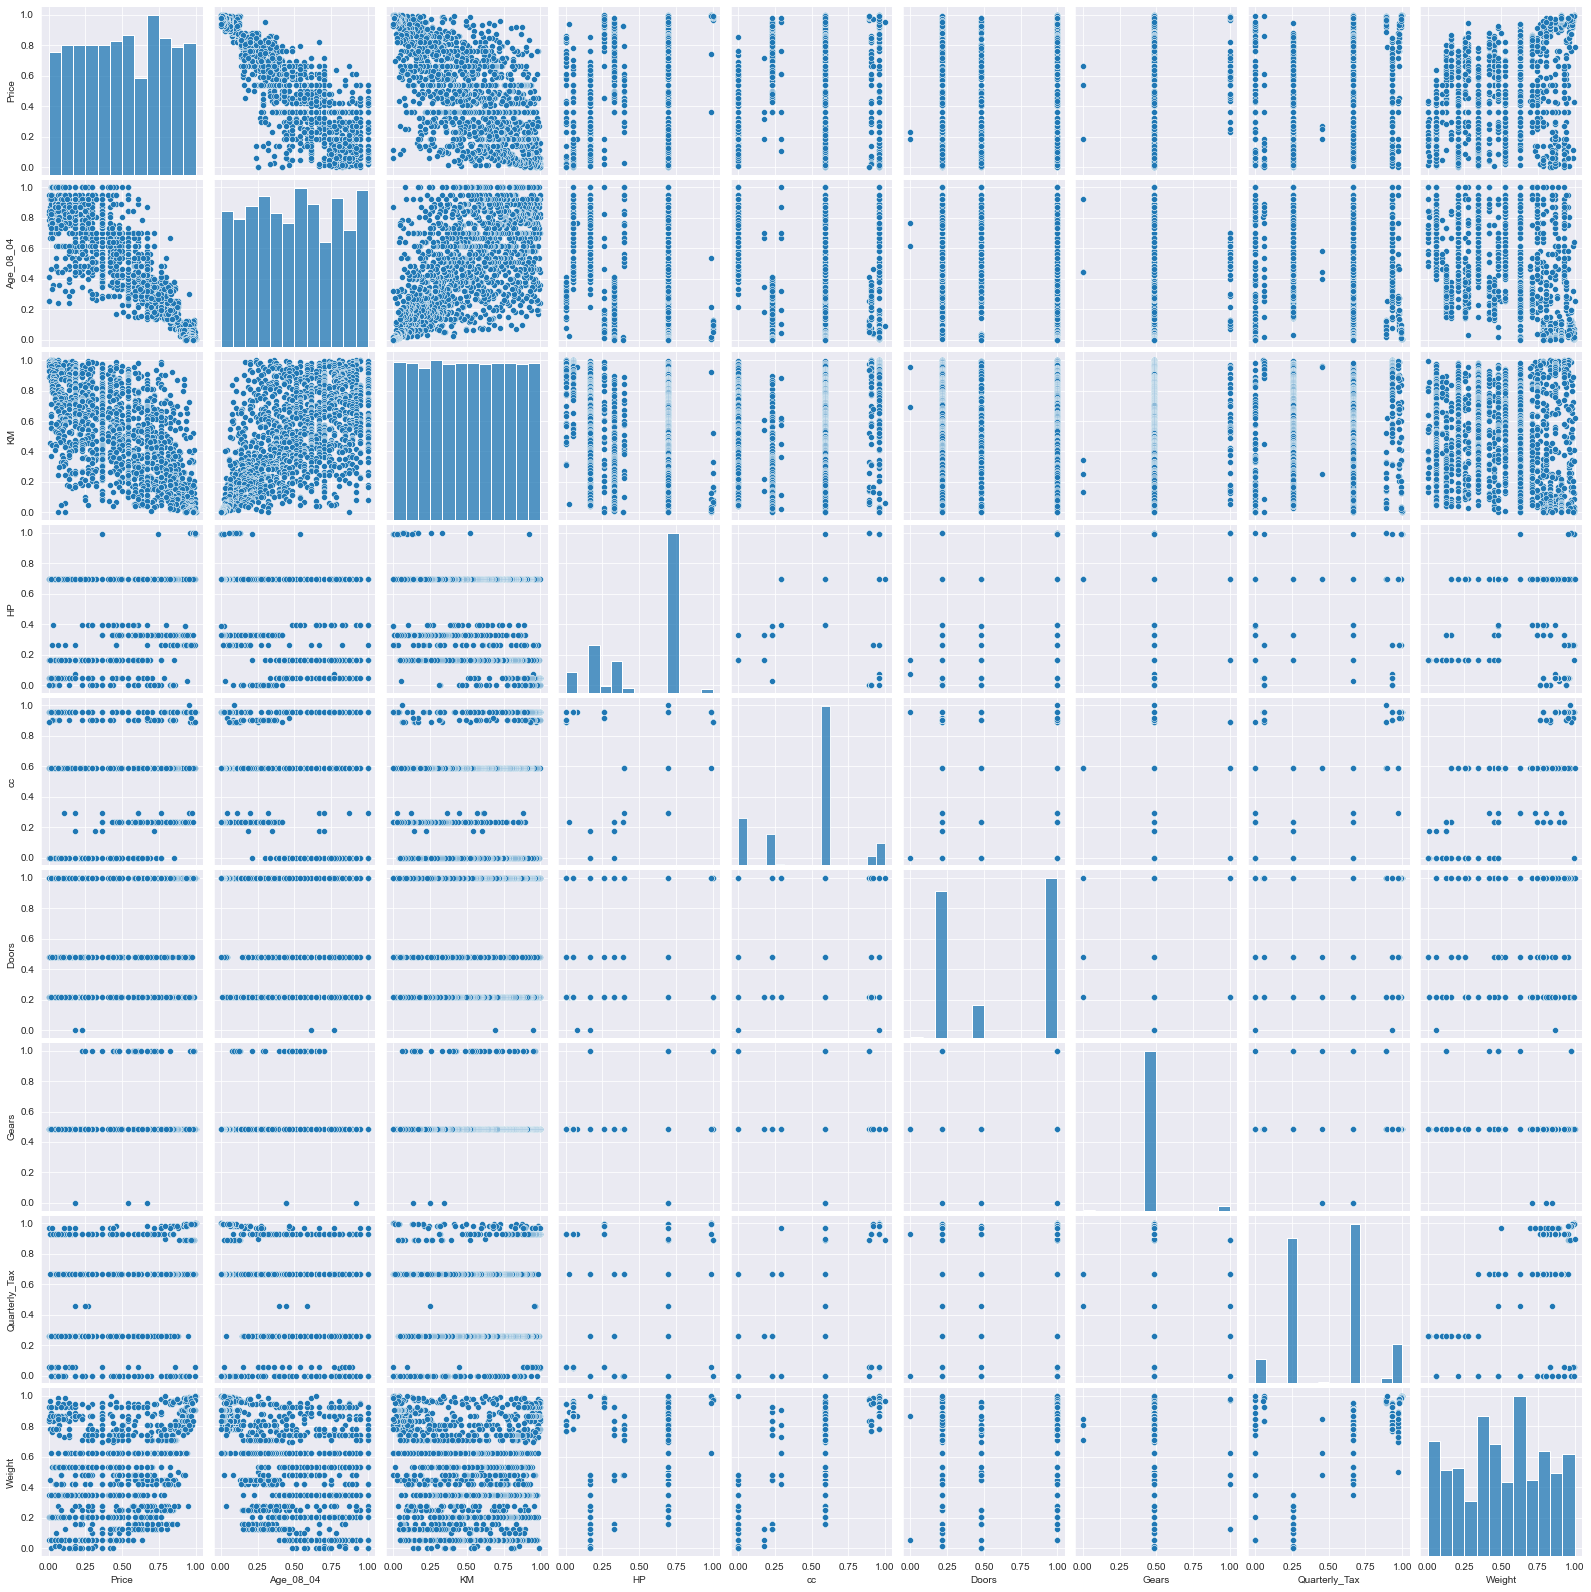

In [77]:
sns.set_style(style='darkgrid')
sns.pairplot(df_qtdata)

### Build Model

In [149]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_qtdata).fit()

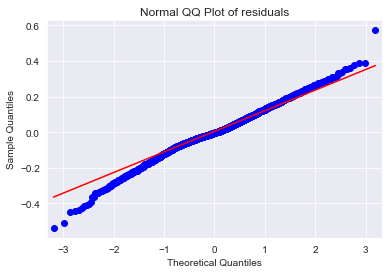

In [79]:
#  Residual Analysis

qqplot = sm.qqplot(model.resid,line = 'q')
plt.title("Normal QQ Plot of residuals")
plt.show()

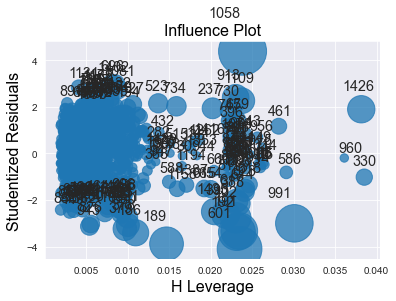

In [73]:
# Influencers

influence_plot(model)
plt.show()

In [150]:
# Improving the model

data_new = df_qtdata.drop(df_qtdata.index[[189,601,991,1058,1426]],axis=0).reset_index()
data_new = data_new.drop(['index'],axis=1)

# Final Model Building

final_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data_new).fit()
modelqt = final_model.rsquared

# Predict for given data

new_data = pd.DataFrame({'Age_08_04':26,'KM':48000,'HP':90,'cc':2000,'Doors':3,'Gears':5,'Quarterly_Tax':210,'Weight':1165},index=[1])
predict3 = final_model.predict(new_data)

In [83]:
predict3

1   -10505.426578
dtype: float64

In [84]:
final_model.params

Intercept        0.722243
Age_08_04       -0.649930
KM              -0.217694
HP               0.160202
cc              -0.118113
Doors            0.007770
Gears            0.131934
Quarterly_Tax    0.100819
Weight           0.137345
dtype: float64

In [151]:
modelqt

0.7969779481653654

### Normalizer

In [153]:
df = pd.read_csv('E:/ExcelR Assignment/Assignment 5 - Multi Linear Regression/ToyotaCorolla.csv',encoding= 'unicode_escape')
df = df.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1)
df.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [154]:
n = Normalizer()
ndf = n.fit_transform(df)
ndf = n.transform(df)
df_ndata = pd.DataFrame(data=ndf, columns=['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'])
df_ndata.head()

Price  Age_08_04        KM        HP        cc     Doors     Gears  \
0  0.275835   0.000470  0.960029  0.001839  0.040864  0.000061  0.000102   
1  0.185165   0.000310  0.982208  0.001212  0.026933  0.000040  0.000067   
2  0.316733   0.000545  0.947043  0.002043  0.045410  0.000068  0.000114   
3  0.297051   0.000517  0.953742  0.001788  0.039739  0.000060  0.000099   
4  0.335792   0.000733  0.940218  0.002198  0.048842  0.000073  0.000122   

   Quarterly_Tax    Weight  
0       0.004291  0.023804  
1       0.002828  0.015689  
2       0.004768  0.026451  
3       0.004173  0.023148  
4       0.005128  0.028573

#### Finding Correlation

In [155]:
df_ndata.corr()

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000   0.186625 -0.888243  0.893448  0.751821  0.856173   
Age_08_04      0.186625   1.000000 -0.082087  0.539847  0.441524  0.476069   
KM            -0.888243  -0.082087  1.000000 -0.751177 -0.662833 -0.746328   
HP             0.893448   0.539847 -0.751177  1.000000  0.808352  0.900020   
cc             0.751821   0.441524 -0.662833  0.808352  1.000000  0.759319   
Doors          0.856173   0.476069 -0.746328  0.900020  0.759319  1.000000   
Gears          0.883359   0.588699 -0.745608  0.972033  0.814037  0.911526   
Quarterly_Tax  0.789040   0.214197 -0.669261  0.686090  0.644360  0.680565   
Weight         0.902992   0.552524 -0.780678  0.969205  0.826760  0.919894   

                  Gears  Quarterly_Tax    Weight  
Price          0.883359       0.789040  0.902992  
Age_08_04      0.588699       0.214197  0.552524  
KM            -0.745608      -0.669261 -0.780678  
HP             0.972033       0.686090  0.969205  
cc             0.814037       0.644360  0.826760  
Doors          0.911526       0.680565  0.919894  
Gears          1.000000       0.710611  0.992641  
Quarterly_Tax  0.710611       1.000000  0.749911  
Weight         0.992641       0.749911  1.000000

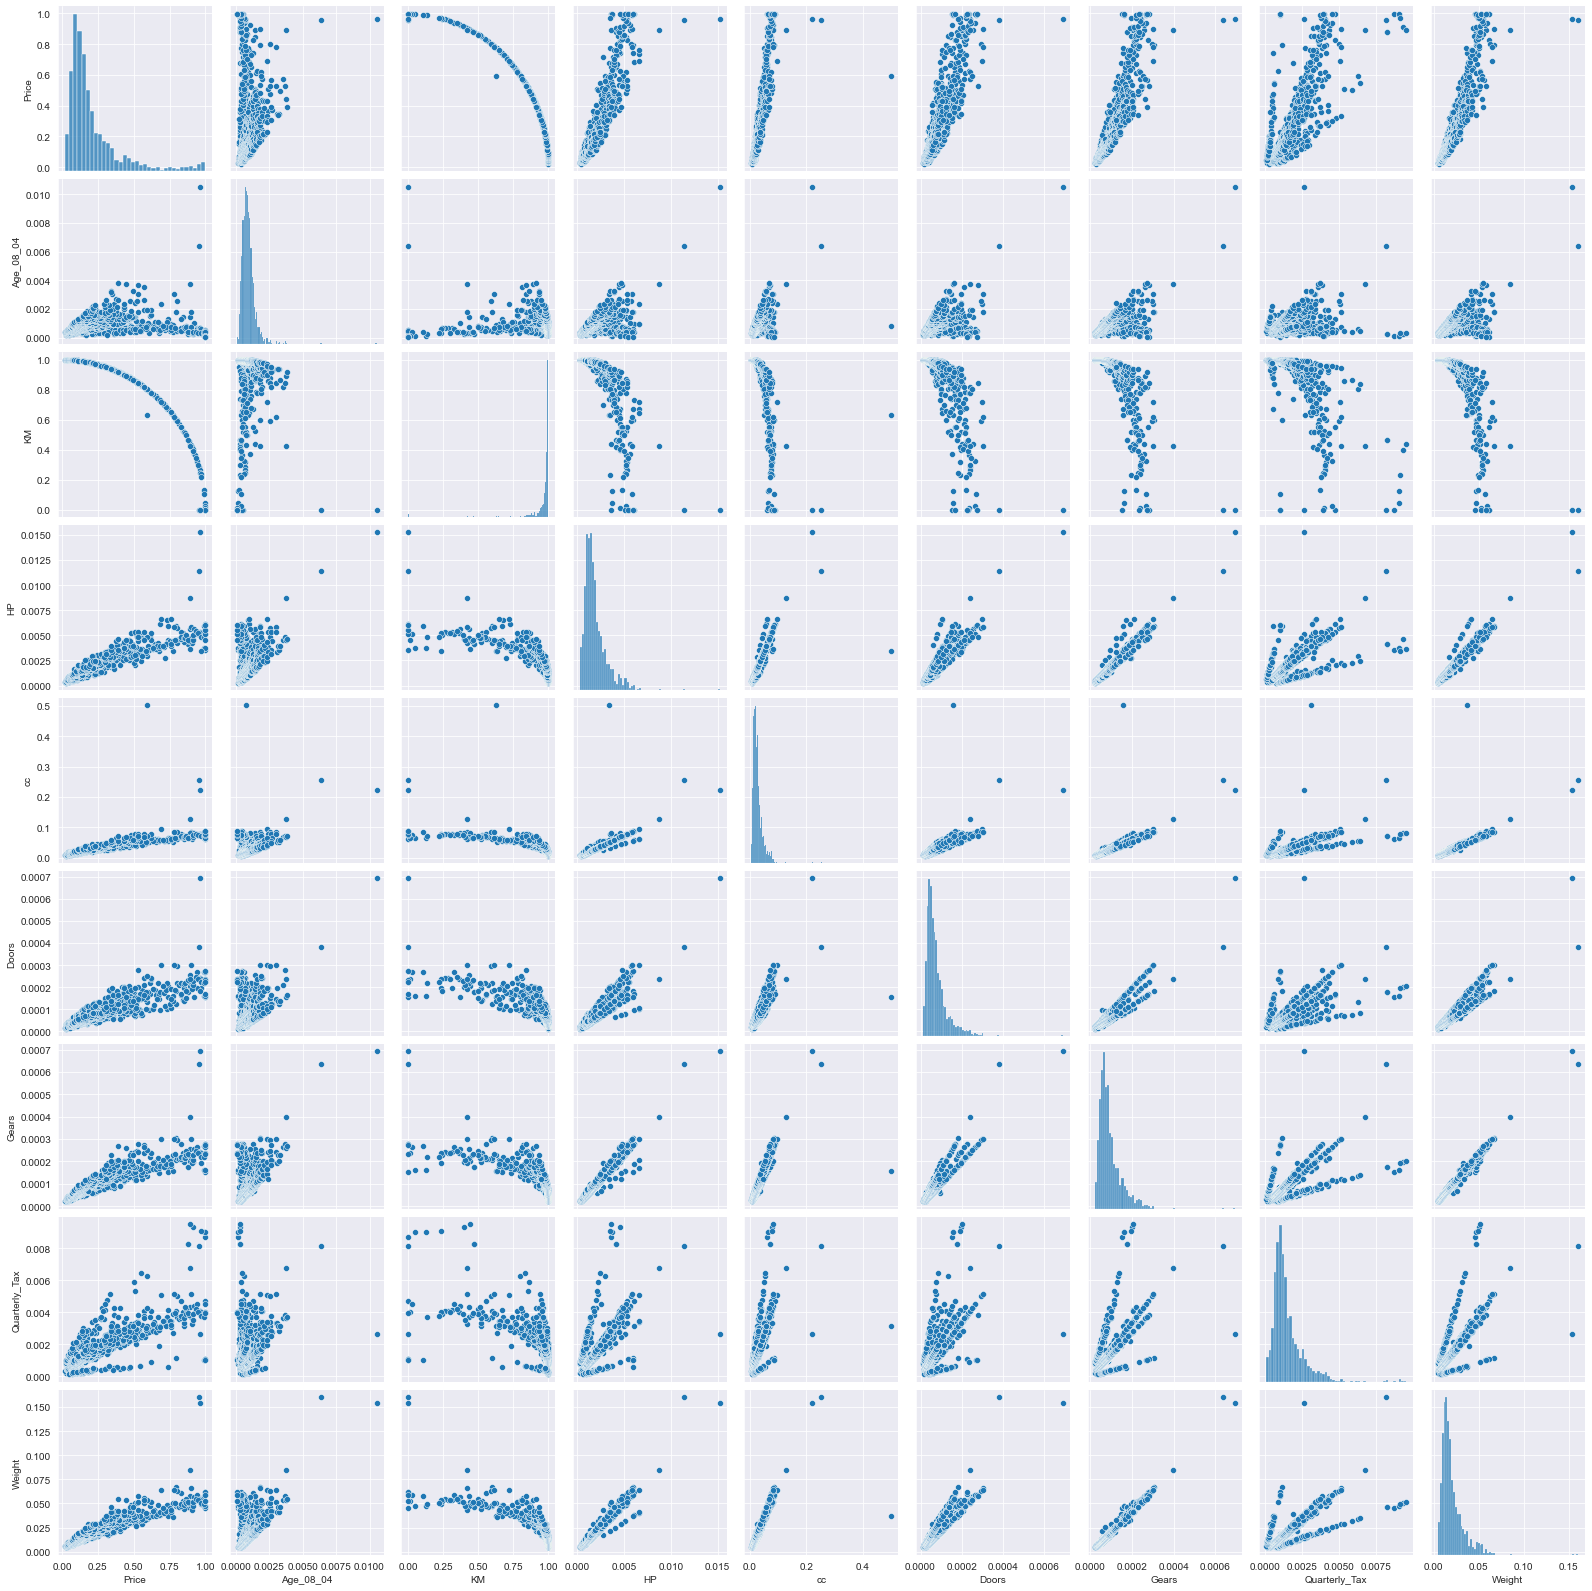

In [89]:
sns.set_style(style='darkgrid')
sns.pairplot(df_ndata)

### Build Model

In [156]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_ndata).fit()

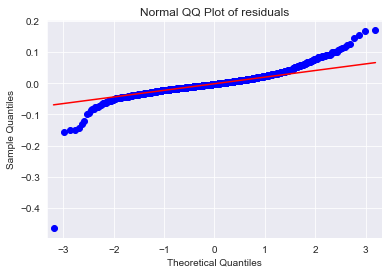

In [91]:
#  Residual Analysis

qqplot = sm.qqplot(model.resid,line = 'q')
plt.title("Normal QQ Plot of residuals")
plt.show()

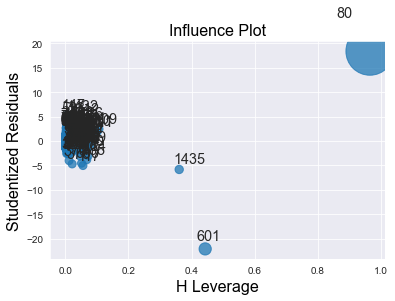

In [92]:
# Influencers

influence_plot(model)
plt.show()

In [157]:
# Improving the model

data_new = df_ndata.drop(df_ndata.index[[80,601,1435]],axis=0).reset_index()
data_new = data_new.drop(['index'],axis=1)

# Final Model Building

final_model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data_new).fit()
modelnorm = final_model.rsquared
final_model.params

Intercept          0.216235
Age_08_04       -110.385412
KM                -0.218457
HP                53.313238
cc                -2.885723
Doors            -51.577118
Gears           -492.357273
Quarterly_Tax     14.745058
Weight            16.109362
dtype: float64

In [158]:
modelnorm

0.9826382186539283

In [159]:
# Predict for given data

new_data = pd.DataFrame({'Age_08_04':26,'KM':48000,'HP':90,'cc':2000,'Doors':3,'Gears':5,'Quarterly_Tax':210,'Weight':1165},index=[1])
predict4 = final_model.predict(new_data)
predict4

1    4918.336732
dtype: float64

### SK Learn

In [127]:
df = pd.read_csv('E:/ExcelR Assignment/Assignment 5 - Multi Linear Regression/ToyotaCorolla.csv',encoding= 'unicode_escape')
df = df.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1)
df.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [128]:
# Build Model

x = df.iloc[:,1:]
y = df.iloc[:,0]

# Deciding Train and Test data

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

r2scorewt = r2_score(y_test,y_pred)

In [129]:
r2scorewt

0.6550065853643854

### SK Learn with Transformation

#### Standardization

In [130]:
df = pd.read_csv('E:/ExcelR Assignment/Assignment 5 - Multi Linear Regression/ToyotaCorolla.csv',encoding= 'unicode_escape')
df = df.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1)
data=df

data.iloc[:,:] = StandardScaler().fit_transform(data.iloc[:,:])
data.head()

Price  Age_08_04        KM        HP        cc     Doors     Gears  \
0  0.763763  -1.771966 -0.574695 -0.768042  0.997419 -1.085139 -0.140425   
1  0.832715  -1.771966  0.117454 -0.768042  0.997419 -1.085139 -0.140425   
2  0.887877  -1.718184 -0.715386 -0.768042  0.997419 -1.085139 -0.140425   
3  1.163685  -1.610620 -0.547650 -0.768042  0.997419 -1.085139 -0.140425   
4  0.832715  -1.395491 -0.801028 -0.768042  0.997419 -1.085139 -0.140425   

   Quarterly_Tax    Weight  
0        2.98868  1.758561  
1        2.98868  1.758561  
2        2.98868  1.758561  
3        2.98868  1.758561  
4        2.98868  1.853577

In [131]:
# Correlation Matrix

data.corr()

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.876590 -0.569960  0.314990  0.126389  0.185326   
Age_08_04     -0.876590   1.000000  0.505672 -0.156622 -0.098084 -0.148359   
KM            -0.569960   0.505672  1.000000 -0.333538  0.102683 -0.036197   
HP             0.314990  -0.156622 -0.333538  1.000000  0.035856  0.092424   
cc             0.126389  -0.098084  0.102683  0.035856  1.000000  0.079903   
Doors          0.185326  -0.148359 -0.036197  0.092424  0.079903  1.000000   
Gears          0.063104  -0.005364  0.015023  0.209477  0.014629 -0.160141   
Quarterly_Tax  0.219197  -0.198431  0.278165 -0.298432  0.306996  0.109363   
Weight         0.581198  -0.470253 -0.028598  0.089614  0.335637  0.302618   

                  Gears  Quarterly_Tax    Weight  
Price          0.063104       0.219197  0.581198  
Age_08_04     -0.005364      -0.198431 -0.470253  
KM             0.015023       0.278165 -0.028598  
HP             0.209477      -0.298432  0.089614  
cc             0.014629       0.306996  0.335637  
Doors         -0.160141       0.109363  0.302618  
Gears          1.000000      -0.005452  0.020613  
Quarterly_Tax -0.005452       1.000000  0.626134  
Weight         0.020613       0.626134  1.000000

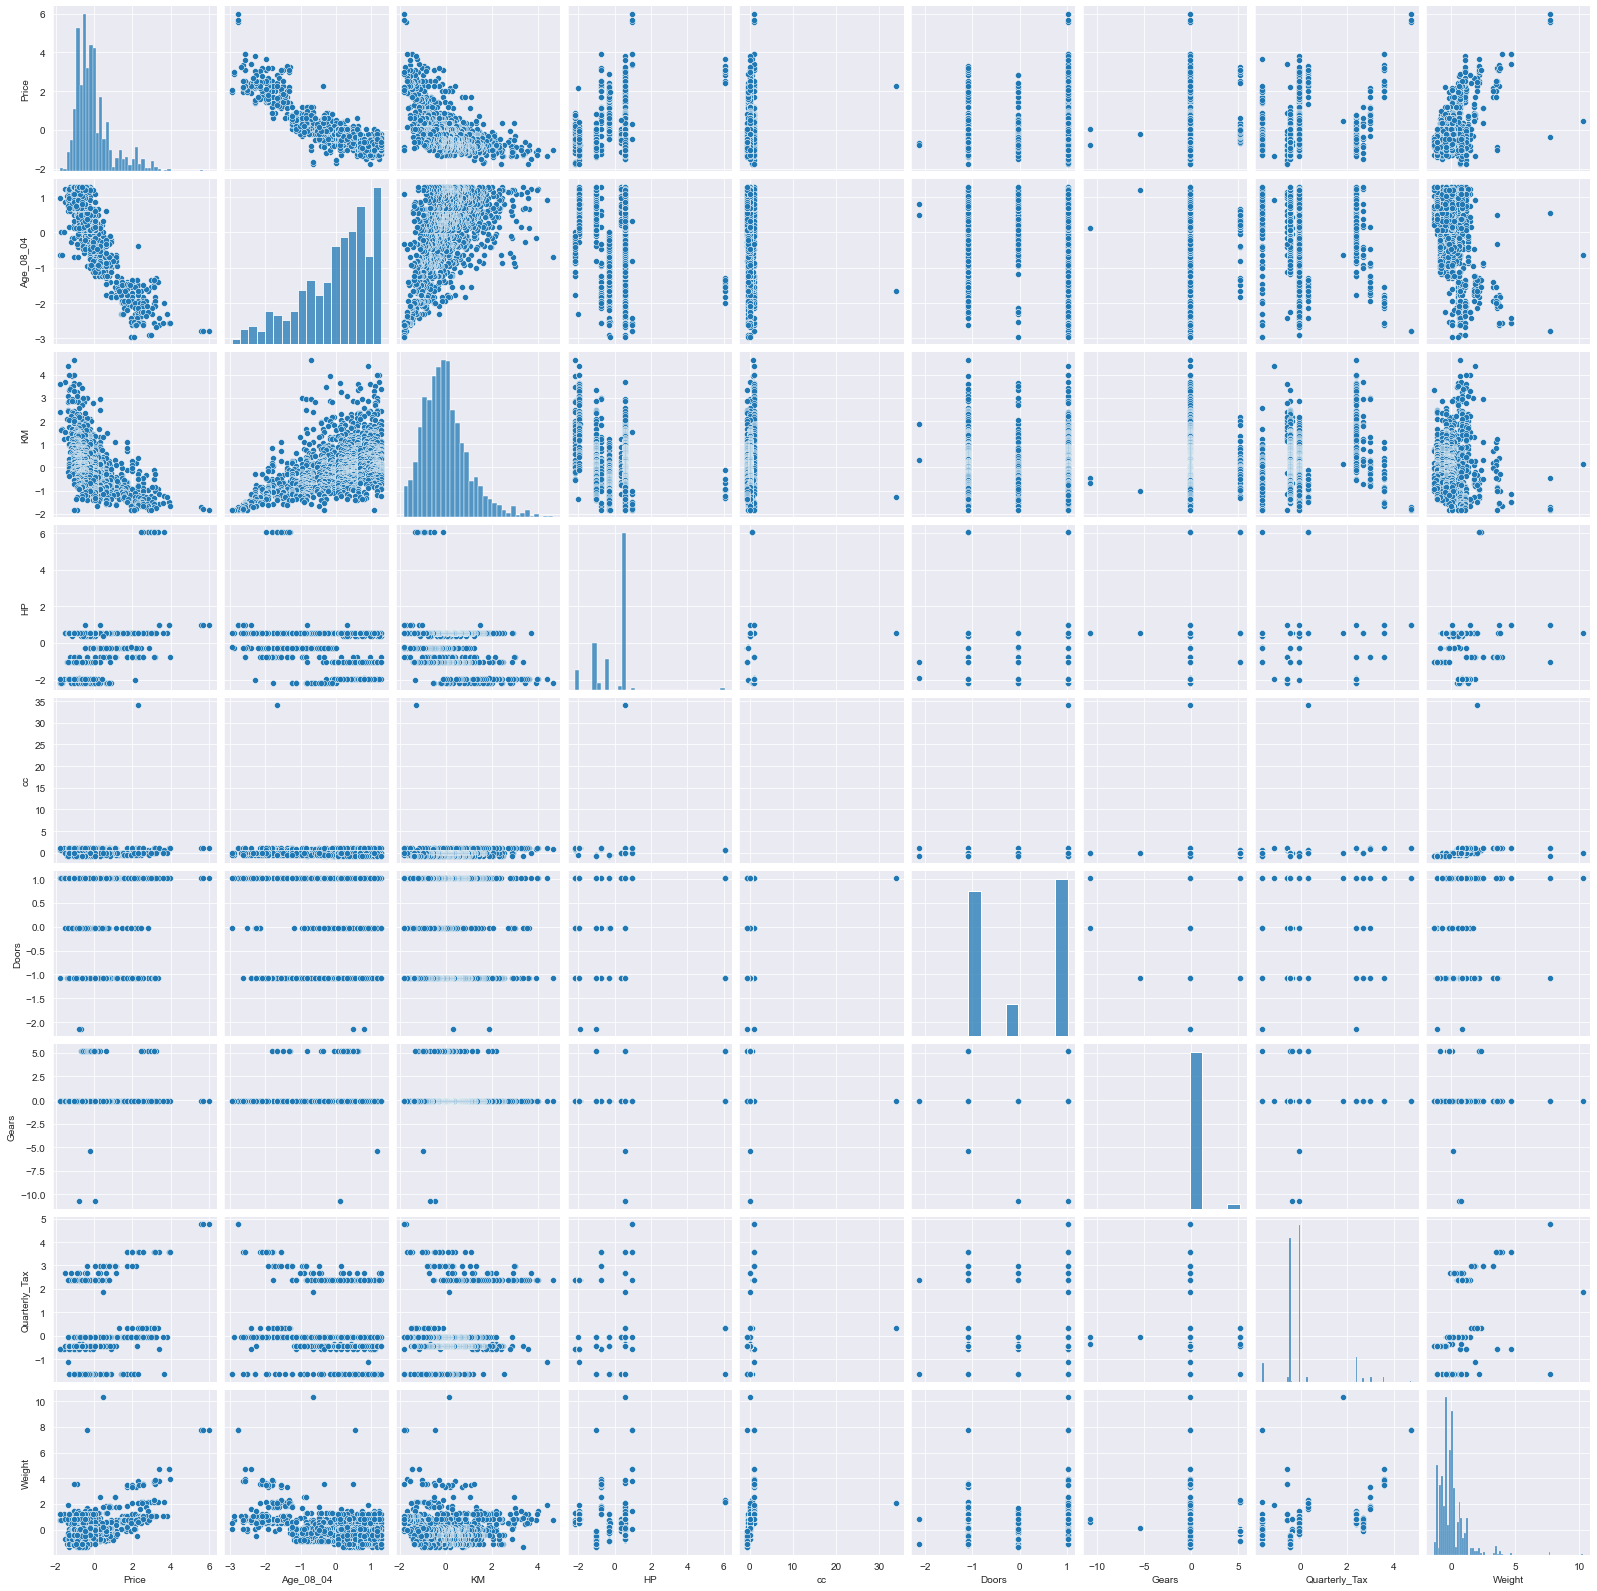

In [124]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [132]:
# Build Model

x = data.iloc[:,1:]
y = data.iloc[:,0]

# Deciding Train and Test data

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred1 = model.predict(X_test)

r2scorewt1 = r2_score(y_test,y_pred1)

In [133]:
r2scorewt1

0.6550065853643855

### Quantile Transformation

In [134]:
df = pd.read_csv('E:/ExcelR Assignment/Assignment 5 - Multi Linear Regression/ToyotaCorolla.csv',encoding= 'unicode_escape')
df = df.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1)
data=df
data.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [135]:
qt = QuantileTransformer(random_state=0)
qtdf = qt.fit_transform(data)
qtdf = qt.transform(data)
df_qtdata = pd.DataFrame(data=qtdf,columns=['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'])
df_qtdata.head()

Price  Age_08_04        KM        HP        cc     Doors     Gears  \
0  0.847848   0.080080  0.294745  0.261762  0.958458  0.217718  0.486486   
1  0.855355   0.080080  0.606682  0.261762  0.958458  0.217718  0.486486   
2  0.862863   0.083584  0.241271  0.261762  0.958458  0.217718  0.486486   
3  0.878378   0.093093  0.308308  0.261762  0.958458  0.217718  0.486486   
4  0.855355   0.118118  0.209444  0.261762  0.958458  0.217718  0.486486   

   Quarterly_Tax    Weight  
0       0.978478  0.958959  
1       0.978478  0.958959  
2       0.978478  0.958959  
3       0.978478  0.958959  
4       0.978478  0.963463

#### Finding Correlation

In [119]:
df_qtdata.corr()

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.841163 -0.615641  0.235702  0.147965  0.208832   
Age_08_04     -0.841163   1.000000  0.530927 -0.091719 -0.140818 -0.139092   
KM            -0.615641   0.530927  1.000000 -0.205464  0.157477 -0.042996   
HP             0.235702  -0.091719 -0.205464  1.000000  0.400790  0.147308   
cc             0.147965  -0.140818  0.157477  0.400790  1.000000  0.152336   
Doors          0.208832  -0.139092 -0.042996  0.147308  0.152336  1.000000   
Gears          0.076067  -0.023353  0.019724  0.136519  0.071749 -0.160334   
Quarterly_Tax  0.319276  -0.271365  0.024733  0.062939  0.520287  0.366041   
Weight         0.415732  -0.381465 -0.063968  0.169269  0.691025  0.460565   

                  Gears  Quarterly_Tax    Weight  
Price          0.076067       0.319276  0.415732  
Age_08_04     -0.023353      -0.271365 -0.381465  
KM             0.019724       0.024733 -0.063968  
HP             0.136519       0.062939  0.169269  
cc             0.071749       0.520287  0.691025  
Doors         -0.160334       0.366041  0.460565  
Gears          1.000000       0.100044  0.015954  
Quarterly_Tax  0.100044       1.000000  0.713740  
Weight         0.015954       0.713740  1.000000

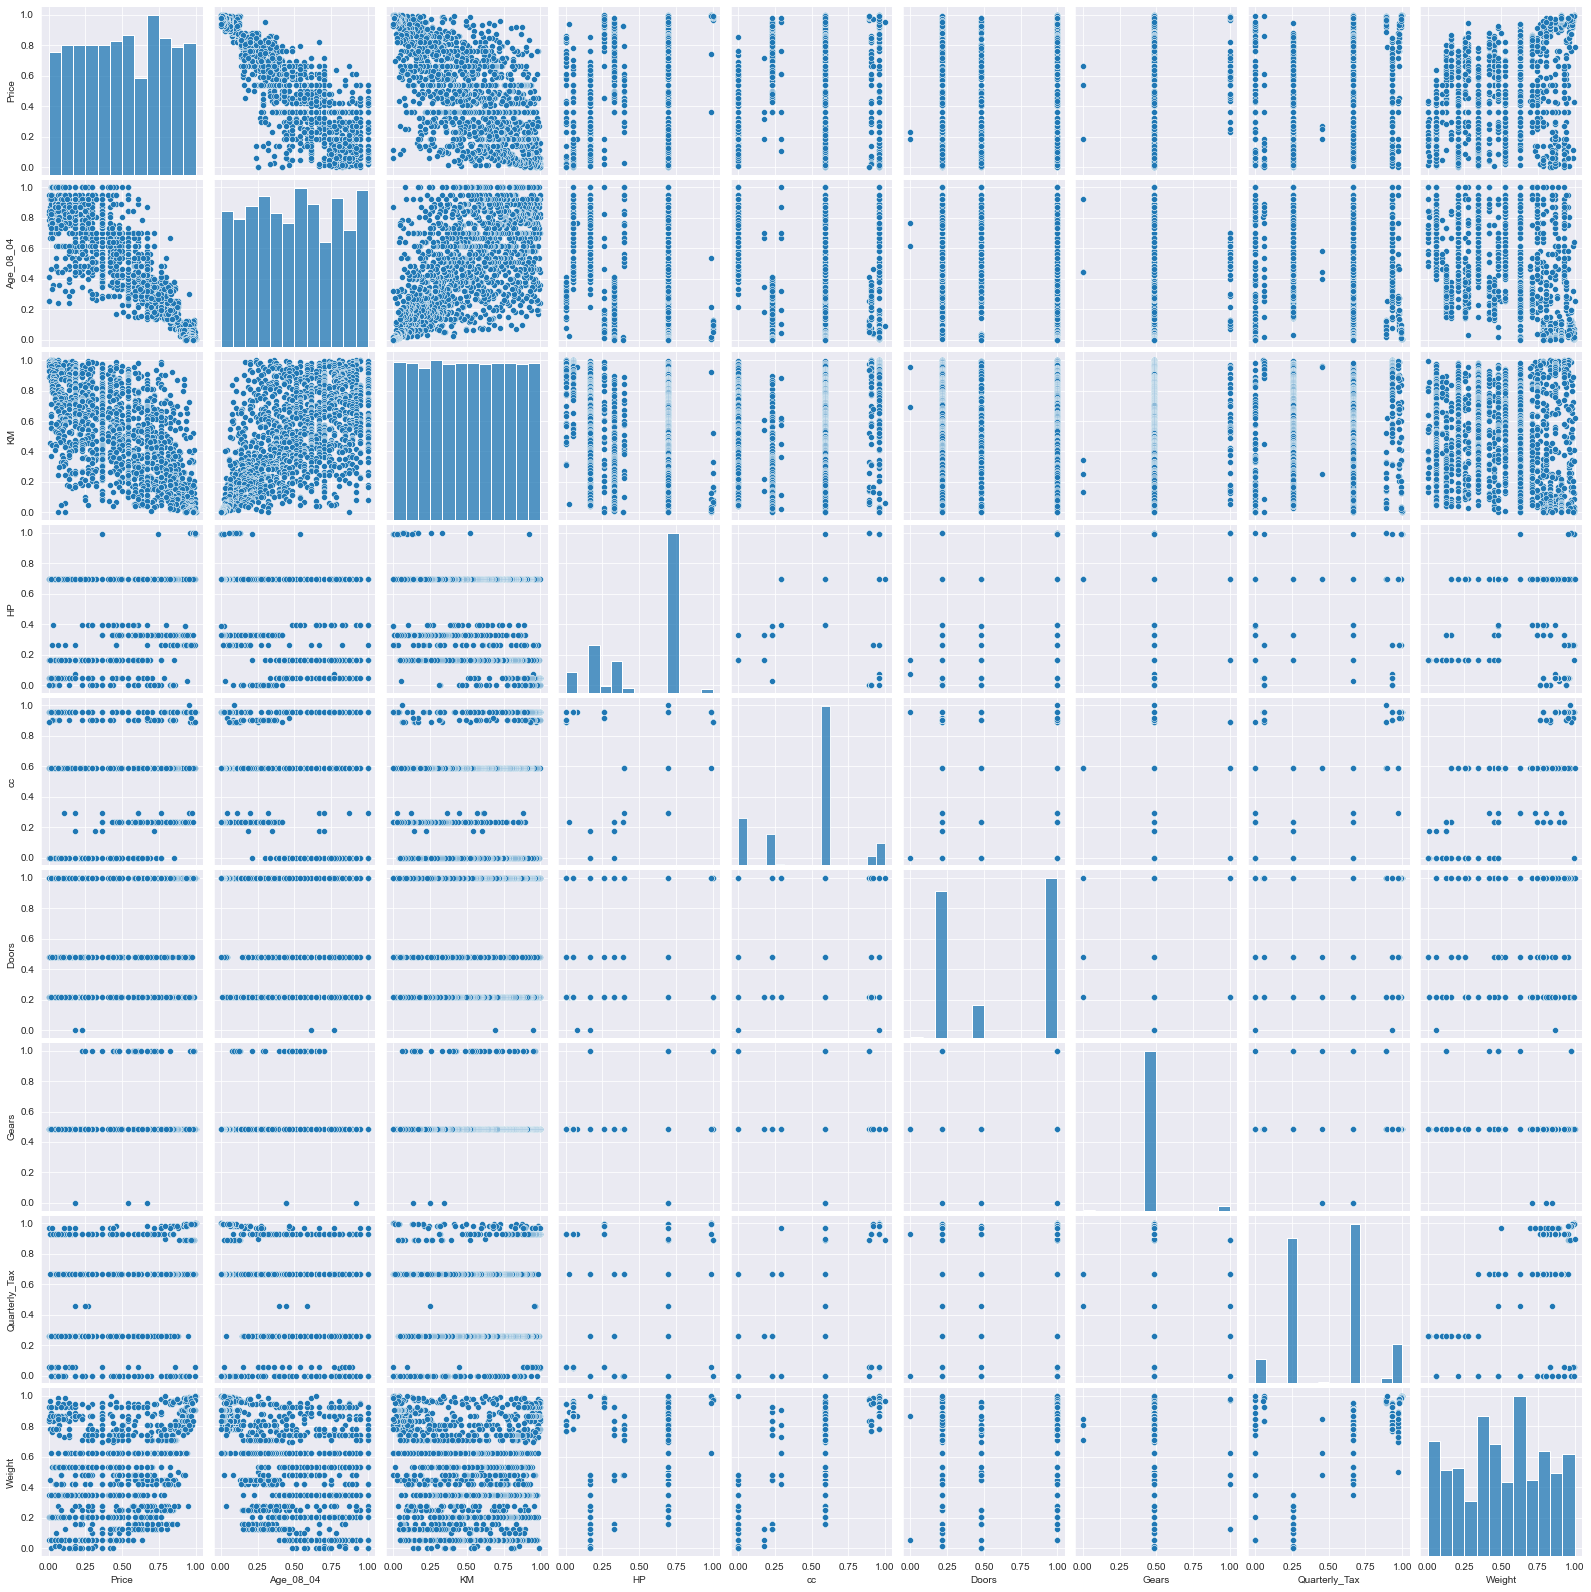

In [120]:
sns.set_style(style='darkgrid')
sns.pairplot(df_qtdata)

#### Build Model

In [136]:
# Build Model

x = df_qtdata.iloc[:,1:]
y = df_qtdata.iloc[:,0]

# Deciding Train and Test data

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred3 = model.predict(X_test)

r2scorewt3 = r2_score(y_test,y_pred3)

In [137]:
r2scorewt3

0.7682626344271929

### Normalizer

In [138]:
df = pd.read_csv('E:/ExcelR Assignment/Assignment 5 - Multi Linear Regression/ToyotaCorolla.csv',encoding= 'unicode_escape')
df = df.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee','BOVAG_Guarantee','Guarantee_Period','ABS','Airbag_1','Airbag_2','Airco','Automatic_airco','Boardcomputer','CD_Player','Central_Lock','Powered_Windows','Power_Steering','Radio','Mistlamps','Sport_Model','Backseat_Divider','Metallic_Rim','Radio_cassette','Tow_Bar'],axis=1)
data=df

In [139]:
# Normalizer

n = Normalizer()
ndf = n.fit_transform(data)
ndf = n.transform(data)
df_ndata = pd.DataFrame(data=ndf,columns=['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'])
df_ndata.head()

Price  Age_08_04        KM        HP        cc     Doors     Gears  \
0  0.275835   0.000470  0.960029  0.001839  0.040864  0.000061  0.000102   
1  0.185165   0.000310  0.982208  0.001212  0.026933  0.000040  0.000067   
2  0.316733   0.000545  0.947043  0.002043  0.045410  0.000068  0.000114   
3  0.297051   0.000517  0.953742  0.001788  0.039739  0.000060  0.000099   
4  0.335792   0.000733  0.940218  0.002198  0.048842  0.000073  0.000122   

   Quarterly_Tax    Weight  
0       0.004291  0.023804  
1       0.002828  0.015689  
2       0.004768  0.026451  
3       0.004173  0.023148  
4       0.005128  0.028573

#### Finding Correlation

In [140]:
df_ndata.corr()

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000   0.186625 -0.888243  0.893448  0.751821  0.856173   
Age_08_04      0.186625   1.000000 -0.082087  0.539847  0.441524  0.476069   
KM            -0.888243  -0.082087  1.000000 -0.751177 -0.662833 -0.746328   
HP             0.893448   0.539847 -0.751177  1.000000  0.808352  0.900020   
cc             0.751821   0.441524 -0.662833  0.808352  1.000000  0.759319   
Doors          0.856173   0.476069 -0.746328  0.900020  0.759319  1.000000   
Gears          0.883359   0.588699 -0.745608  0.972033  0.814037  0.911526   
Quarterly_Tax  0.789040   0.214197 -0.669261  0.686090  0.644360  0.680565   
Weight         0.902992   0.552524 -0.780678  0.969205  0.826760  0.919894   

                  Gears  Quarterly_Tax    Weight  
Price          0.883359       0.789040  0.902992  
Age_08_04      0.588699       0.214197  0.552524  
KM            -0.745608      -0.669261 -0.780678  
HP             0.972033       0.686090  0.969205  
cc             0.814037       0.644360  0.826760  
Doors          0.911526       0.680565  0.919894  
Gears          1.000000       0.710611  0.992641  
Quarterly_Tax  0.710611       1.000000  0.749911  
Weight         0.992641       0.749911  1.000000

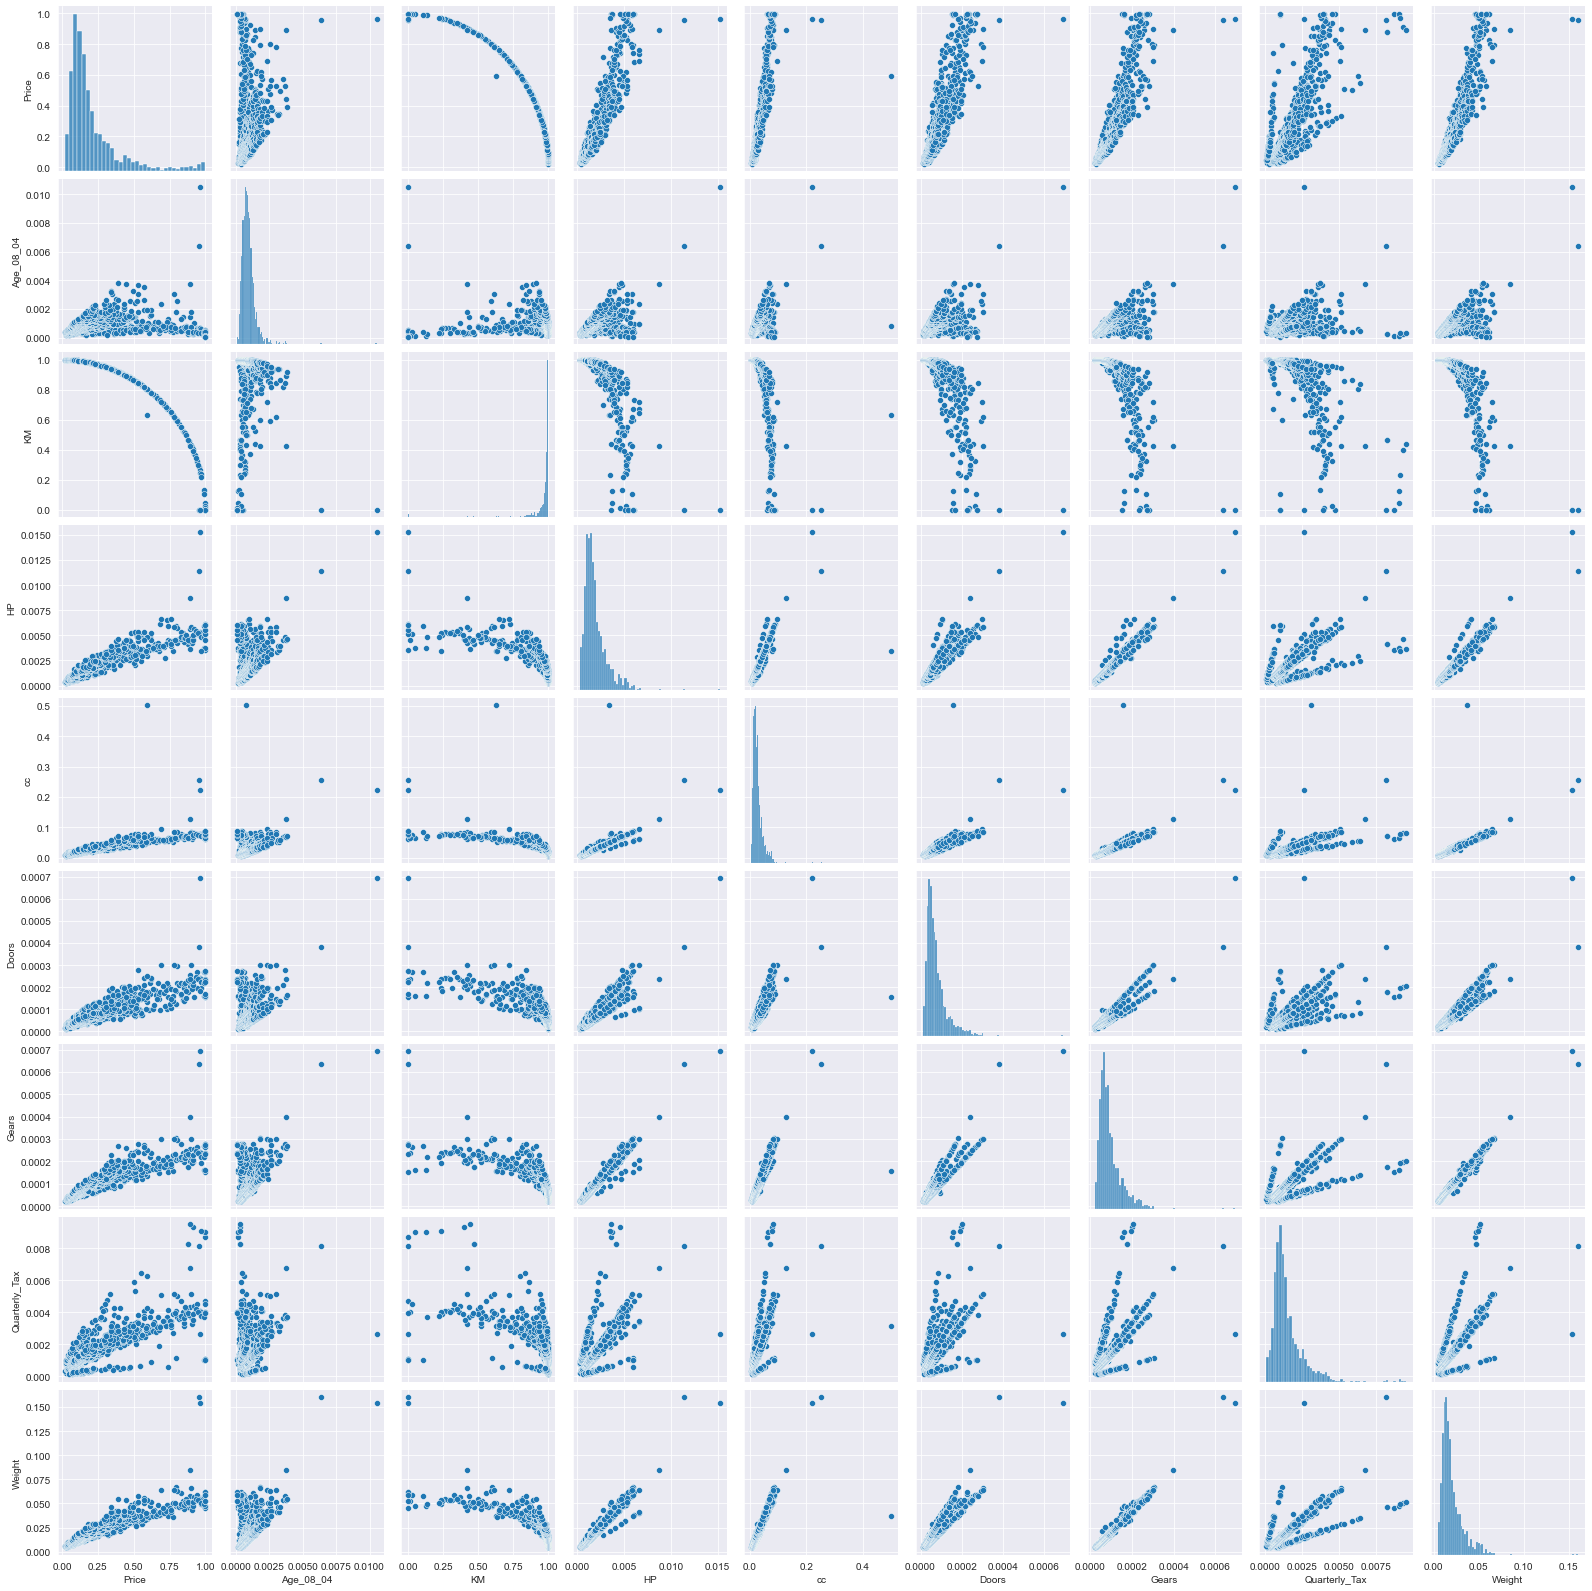

In [141]:
sns.set_style(style='darkgrid')
sns.pairplot(df_ndata)

In [143]:
# Build Model

x = df_ndata.iloc[:,1:]
y = df_ndata.iloc[:,0]

# Deciding Train and Test data

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred4 = model.predict(X_test)

r2scorewt4 = r2_score(y_test,y_pred4)

In [144]:
r2scorewt4

0.8299044756788104

In [161]:
Analysis = {'Method':['OLS Without Transformation','OLS with Standard Scaler','OLS with Quantile Transformation','OLS with Normalization'],'R-Squared Values':[finalmodelwt,finalmodel1,modelqt,modelnorm],'Predicted Value':[predictwt,predict1,predict3,predict4]}
Analysis = pd.DataFrame(Analysis)

Analysis1 = {'Method':['Sklearn LR without Transformation','Sklearn LR with Standard Scaler','Sklearn LR with Quantile Transformation','Sklearn LR with Normalization'],'R-Squared Values':[r2scorewt,r2scorewt1,r2scorewt3,r2scorewt4],'Predicted Values':[y_pred,y_pred1,y_pred3,y_pred4]}
Analysis1 = pd.DataFrame(Analysis1)

TotalAnalysis = pd.concat([Analysis,Analysis1],axis=1)
TotalAnalysis

Method  R-Squared Values  \
0        OLS Without Transformation          0.869379   
1          OLS with Standard Scaler          0.982638   
2  OLS with Quantile Transformation          0.796978   
3            OLS with Normalization          0.982638   

                    Predicted Value                                   Method  \
0  1    16149.527067
dtype: float64        Sklearn LR without Transformation   
1   1   -9088.955328
dtype: float64          Sklearn LR with Standard Scaler   
2  1   -10505.426578
dtype: float64  Sklearn LR with Quantile Transformation   
3   1    4918.336732
dtype: float64            Sklearn LR with Normalization   

   R-Squared Values                                   Predicted Values  
0          0.655007  [8217.901236141963, 10406.477367278054, 12920....  
1          0.655007  [-0.6930860911592667, -0.08945776307479222, 0....  
2          0.768263  [0.29594876874570814, 0.5360451036805961, 0.76...  
3          0.829904  [0.07957858225334341, 0.11093825935270195, 0.3...